#Multiclass Classification with XGBoost Algorithm

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. Further information about XGBoost algortihm: https://xgboost.readthedocs.io/en/stable/

1) Import Dataset and Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb #xgboost has its own library different than scikit-learn
from sklearn import datasets #some popular datasets
from sklearn import model_selection 
from sklearn.metrics import precision_score

In [19]:
#Explanation of datasets
?datasets 

In [20]:
#Import dataset
iris = datasets.load_iris()

###2) Exploring the data

In [21]:
iris #info about dataset, 4 columns + 1 target column with 3 classes ('setosa', 'versicolor', 'virginica')
#feature_names: 'sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Further information about Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris

###3) Data Preparation

In [22]:
x = iris.data #independent variable
y = iris.target #dependent variable

In [23]:
print(len(x))
print(len(y))

150
150


In [24]:
#Split the dataset into two as train and test (80%: train, 20%: test)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y
                                                                    ,test_size = 0.2
                                                                    ,random_state = 100) #seed - to shuffle the rows in the same way each time

In [25]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


###4) Model Selection and Training

In [26]:
dtrain = xgb.DMatrix(x_train, label = y_train)
dtest  = xgb.DMatrix(x_test , label = y_test) 
#DMatrix is an internal data structure that used by XGBoost which is optimized for both memory efficiency and training speed.

In [27]:
params = {'max_depth': 3, #maximum depth of a tree
          'eta': 0.3, #shrinks the feature weights to make the boosting process more conservative, prevents overfitting, 0.3 is the default
          'silent': 1, #do not print the training-iterations
          'num_class': 3, #we have three classes
         }

In [28]:
num_round = 20 #The number of rounds for boosting, default = 10

In [67]:
#Training the dataset
bst = xgb.train(params, dtrain, num_round)

###5) Model Evaluation

In [68]:
#Predictions for test set
preds = bst.predict(dtest)
print('The length of the predictions array:',len(preds))
print(preds) 

The length of the predictions array: 30
[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]


In [69]:
precision_score(y_test, preds,
                average ='weighted') #Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
                                     #This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

1.0

> Precision score = true positives / (true positives + false positives)

For this model precision score equals to 1 therefore there are no false positives, all of the model predictions are true! You can validate it by comparing preds and y_test

In [70]:
#Create a loop to count non-matching pairs of preds and y_test
for i in range(len(preds)):
  false_counter = 0
  if preds[i] == y_test[i]:
    continue
  else:
    false_counter += 1
  i += 1

print('There are', false_counter, 'non-matching pairs')

There are 0 non-matching pairs


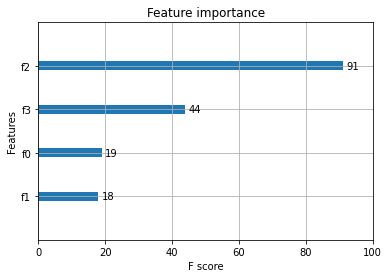

In [71]:
#Plot the feature importances
xgb.plot_importance(bst)

Feature importance: sepal length > sepal width > petal length > petal width